In [40]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dvd = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .csv("/user/klaurens/project/project/amazon_reviews_us_Video_DVD_v1_00.tsv",inferSchema=True,header=True, sep='\t' )

In [9]:
vid = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .csv("/user/klaurens/project/project/amazon_reviews_us_Digital_Video_Download_v1_00.tsv",inferSchema=True,header=True, sep='\t' )

In [16]:
dvd.columns

['marketplace',
 'customer_id',
 'review_id',
 'product_id',
 'product_parent',
 'product_title',
 'product_category',
 'star_rating',
 'helpful_votes',
 'total_votes',
 'vine',
 'verified_purchase',
 'review_headline',
 'review_body',
 'review_date']

In [10]:
dvd.limit(1).toPandas()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,27288431,R33UPQQUZQEM8,B005T4ND06,400024643,Yoga for Movement Disorders DVD: Rebuilding St...,Video DVD,5,3,3,N,Y,This was a gift for my aunt who has Parkinson'...,This was a gift for my aunt who has Parkinson'...,2015-08-31


In [11]:
vid.limit(1).toPandas()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12190288,R3FU16928EP5TC,B00AYB1482,668895143,Enlightened: Season 1,Digital_Video_Download,5,0,0,N,Y,I loved it and I wish there was a season 3,I loved it and I wish there was a season 3... ...,2015-08-31


In [17]:
dvd = dvd.drop('vine', 'verified_purchase')
vid = vid.drop('vine', 'verified_purchase')

In [20]:
vid_date = vid.groupBy('review_date').count().toPandas()
dvd_date = dvd.groupBy('review_date').count().toPandas()

In [24]:
vid_date[vid_date['review_date'].isna()]

,review_date,count
710,NaT,553


In [25]:
dvd_date[dvd_date['review_date'].isna()]

,review_date,count
1321,NaT,672


In [ ]:
# Can drop reviews with NaN date

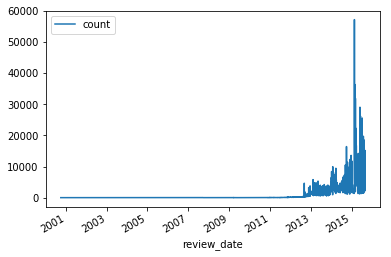

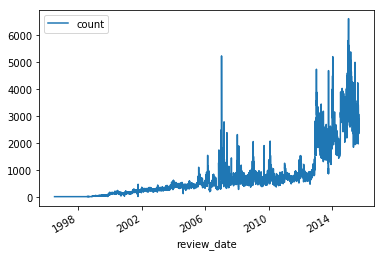

In [46]:
# fig, ax = plt.subplots(1,2)
ax[0] = vid_date.dropna().sort_values('review_date').plot(x = 'review_date')
ax[1] = dvd_date.dropna().sort_values('review_date').plot(x = 'review_date') 

In [ ]:
# Limit scope of reviews to 2013 - present

In [54]:
print('dvd max date', min(dvd_date['review_date'].dt.date), '-', max(dvd_date['review_date'].dt.date))
print('vid max date', min(vid_date['review_date'].dt.date), '-', max(vid_date['review_date'].dt.date))

dvd max date 1996-07-08 - 2015-08-31
vid max date 2000-10-04 - 2015-08-31


In [57]:
dvd_date.groupby(dvd_date['review_date'].dt.year).sum()

,count
review_date,
1996.0,3
1997.0,8
1998.0,1252
1999.0,15408
2000.0,46292
2001.0,66118
2002.0,92987
2003.0,115329
2004.0,146230


In [58]:
vid_date.groupby(vid_date['review_date'].dt.year).sum()

,count
review_date,
2000.0,1
2001.0,1
2002.0,5
2003.0,4
2004.0,6
2005.0,11
2006.0,185
2007.0,2597
2008.0,3081


In [59]:
vid_stars = vid.groupBy('star_rating').count().toPandas()
dvd_stars = dvd.groupBy('star_rating').count().toPandas()

In [60]:
vid_stars

,star_rating,count
0,1,294004
1,3,350900
2,5,2446375
3,4,767302
4,2,198566


In [65]:
dvd_stars

,star_rating,count
0,NaN,4
1,1.0,330122
2,3.0,385874
3,5.0,3329984
4,4.0,811766
5,2.0,211390


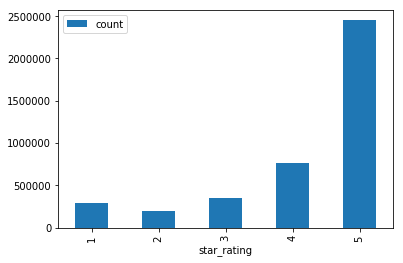

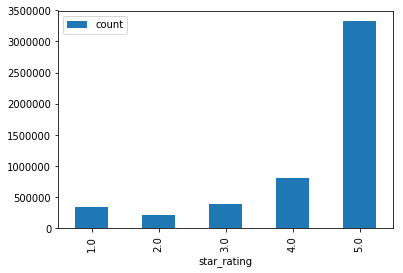

In [64]:
vid_stars.dropna().sort_values('star_rating').plot(x = 'star_rating', kind = 'bar')
dvd_stars.dropna().sort_values('star_rating').plot(x = 'star_rating', kind = 'bar') 

In [66]:
vid_help = vid.groupBy('helpful_votes').count().toPandas()
dvd_help = dvd.groupBy('helpful_votes').count().toPandas()

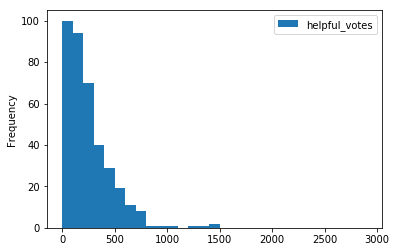

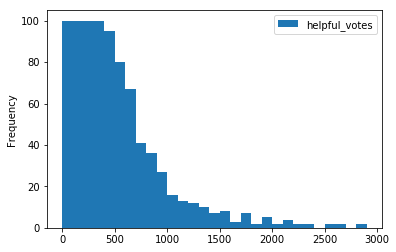

In [87]:
vid_help.dropna().sort_values('helpful_votes').plot(x = 'count', kind = 'hist', bins = range(0, 3000, 100))
dvd_help.dropna().sort_values('helpful_votes').plot(x = 'count', kind = 'hist', bins = range(0, 3000, 100))

In [118]:
vid_help_ratio = vid.filter(col('total_votes') > 0).select('helpful_votes','total_votes').toPandas()
dvd_help_ratio = dvd.filter(col('total_votes') > 0).select('helpful_votes','total_votes').toPandas()

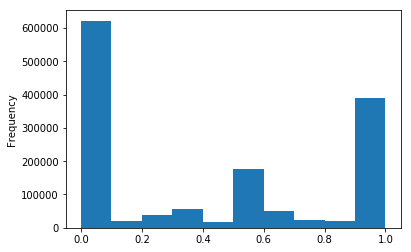

In [121]:
(vid_help_ratio['helpful_votes']/vid_help_ratio['total_votes']).plot(kind = 'hist')

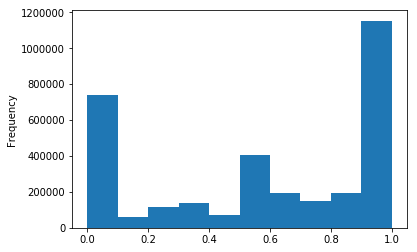

In [122]:
(dvd_help_ratio['helpful_votes']/dvd_help_ratio['total_votes']).plot(kind = 'hist')

In [92]:
# Based on reviews per day and number of helpful vote counts, non-digital (traditional DVD) seems to have a 
# higher engagement of reviewers

In [89]:
vid.groupBy('marketplace').count().show()

+-----------+-------+
|marketplace|  count|
+-----------+-------+
|         US|4057147|
+-----------+-------+



In [90]:
dvd.groupBy('marketplace').count().show()

+-----------+-------+
|marketplace|  count|
+-----------+-------+
|         US|5069140|
+-----------+-------+



In [91]:
# All reviews are from US purchases - can drop column

In [107]:
from pyspark.sql.functions import isnan, when, count, col, isnull

In [125]:
print("No review body:", dvd.filter(col('review_body').isNull()).count())
print("No review headline:", dvd.filter(col('review_headline').isNull()).count())
print("Total:", dvd.count())

No review body: 456
No review headline: 156
Total: 5069140


In [126]:
print("No review body:", vid.filter(col('review_body').isNull()).count())
print("No review headline:", vid.filter(col('review_headline').isNull()).count())
print("Total:", vid.count())

No review body: 616
No review headline: 368
Total: 4057147


In [127]:
# Can drop rows without review body or headline (~ 0.0001%)